Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1.satisfaction_level - Уровень удовлетворенности работой
2.Last_evaluation - Время с момента последней оценки в годах
3.number_projects - Количество проектов, выполненных за время работы
4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5.time_spend_company - Стаж работы в компании в годах
6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left - уволился ли сотрудник
8.promotion_last_5years - повышался ли сотрудник за последние пять лет
9.department - отдел в котором работает сотрудник
10.salary - относительный уровень зарплаты

Требуется выполнить следующее задание:
1.Загрузите файл HR.csv в pandas dataframe ( 5 баллов)
2.Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).(10 баллов)
3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.(10 баллов)
4.Рассчитайте сколько сотрудников работает в каждом департаменте.(5 баллов)
5.Показать распределение сотрудников по зарплатам (5 баллов)
6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности (5 баллов)
7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом (10 баллов)
8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности) 10 баллов:
  Доля сотрудников с повышением за последние 5 лет
  Средняя степень удовлетворенности
  Среднее количество проектов
9.Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)Оценить качество модели на тестовой выборки (20 баллов)
10.Загрузить jupyter notebook с решение на github и прислать ссылку (5 баллов)


In [39]:
import pandas as pd

1.Загрузите файл HR.csv в pandas dataframe

In [40]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
#hr.shape

In [42]:
#hr.info()

2.Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [43]:
hr_descr = hr.describe()  # основные статистики для переменных 
hr_descr.loc['mode'] = hr.mode().iloc[0]  # добавление моды
hr_descr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


3.Рассчитать и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные

In [44]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Определите две самые скоррелированные и две наименее скоррелированные переменные

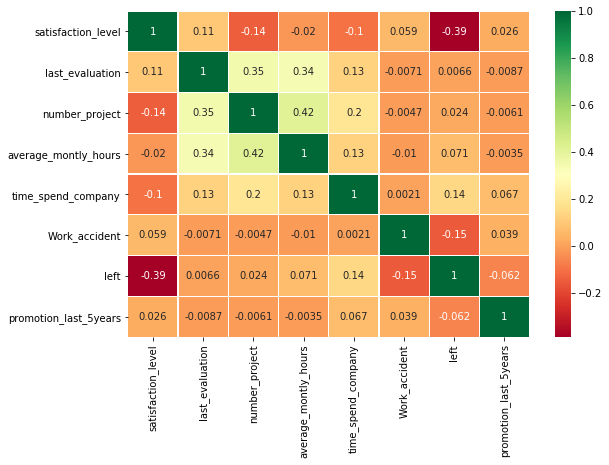

In [46]:
#Для визуализации корреляционной матрицы построим heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

Две самые скоррелированные переменные:

-> Прямая зависимость между кол-вом проектов (number_project) и срендим кол-вом часов на рабочем месте в месяц (average_montly_hours)
-> Обратная зависимость между Уровенем удовлетворенности работой (satisfaction_level) и Уходом сотрудника (left)

Две наименее скоррелированные переменные:

-> Прямая зависимость между Несчастными случаями на работе (Work_accident) и Стажем работы в компании (time_spend_company)
-> Обратная зависимость между повышением сотрудника за последние пять лет (promotion_last_5years) и срендим кол-вом часов на рабочем месте в месяц (average_montly_hours)

4.Рассчитайте сколько сотрудников работает в каждом департаменте.(5 баллов)

In [47]:
hr['department'].value_counts().reset_index()

,index,department
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


Наибольшее количество сотрудников работает в коммерческом департаменте (sales)  и составляет 4140 сотрудников(порядка 30%), а также в техническом департаменте (technical) и департаменте поддержки (support): 2720 (18%) и 2229 (15%) соответственно. Наименьшее количество сорудников работает в департамененте управления (management)

5.Показать распределение сотрудников по зарплатам 

In [48]:
salary = hr['salary'].value_counts().reset_index()
salary

,index,salary
0,low,7316
1,medium,6446
2,high,1237


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

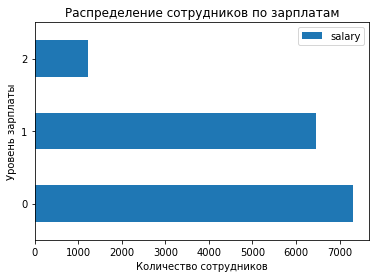

In [49]:
salary.plot(kind='barh')
plt.xlabel('Количество сотрудников')
plt.ylabel('Уровень зарплаты')
plt.title('Распределение сотрудников по зарплатам')

Большинство сотрудников работает с низким уровнем заработной платы (49%). Доля сотрудников с высоким уровенм заработной платы небольшая(8%).

6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [50]:
#department_salary = hr.groupby('department')['salary'].value_counts()
#department_salary
department_salary= hr.groupby(['department','salary']).agg({'salary':['count']})
department_salary

salary
                    count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

Text(0, 0.5, 'Количество сотрудников')

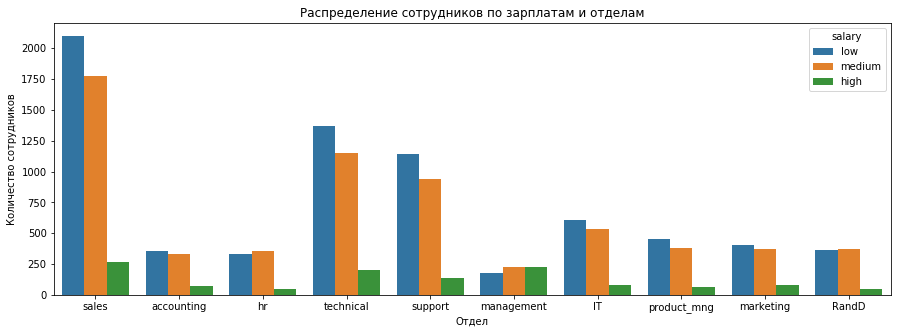

In [51]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'department', hue = 'salary', data = hr)
plt.title('Распределение сотрудников по зарплатам и отделам')
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')

7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом (10 баллов)

H0 - Сотрудники с высоким окладом проводят на работе столько же или больше времени, чем сотрудники с низким окладом    
H1 - Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом

In [52]:
from scipy import stats as st
# применим t-тест Стьюдента

alpha = 0.05  # Уровень значимости
result = st.ttest_ind(hr[hr['salary'] == 'high']['average_montly_hours'], hr[hr['salary'] == 'low']['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом')
else:
    print('Не отвергаем нулевую гипотезу. С уверенностью 95% можем сказать, что сотрудники с высоким окладом проводят на работе столько же или больше времени, чем сотрудники с низким окладом')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу. С уверенностью 95% можем сказать, что сотрудники с высоким окладом проводят на работе столько же или больше времени, чем сотрудники с низким окладом


8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):                      
  Доля сотрудников с повышением за последние 5 лет                  
  Средняя степень удовлетворенности                                  
  Среднее количество проектов

In [53]:
# Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников:
h1 = (hr[hr.left == 1][hr.promotion_last_5years == 1]['promotion_last_5years'].count()) / (hr[hr.left == 1]['left'].count())
# Средний уровень удовлетворенности среди уволившихся сотрудников:
h2 = hr[hr.left == 1]['satisfaction_level'].mean()
# Среднее количество проектов среди уволившихся сотрудников:
h3 = hr[hr.left == 1]['number_project'].mean()

# Доля сотрудников с повышением за последние 5 лет среди оставшихся сотрудников:
h4 = (hr[hr.left == 0][hr.promotion_last_5years == 1]['promotion_last_5years'].count()) / (hr[hr.left == 0]['left'].count())
# Средний уровень удовлетворенности среди оставшихся сотрудников:
h5 = hr[hr.left == 0]['satisfaction_level'].mean()
# Среднее количество проектов среди оставшихся сотрудников:
h6 = hr[hr.left == 0]['number_project'].mean()

print(f'Среди уволившихся сотрудников:')
print(f'Доля сотрудников с повышением за последние 5 лет: {round(h1, 3)*100}%')
print(f'Средний уровень удовлетворенности: {round(h2, 1)}')
print(f'Среднее количество проектов: {round(h3, 1)}')

print(f'\nСреди оставшихся сотрудников:')
print(f'Доля сотрудников с повышением за последние 5 лет: {round(h4, 3)*100}%')
print(f'Средний уровень удовлетворенности: {round(h5, 1)}')
print(f'Среднее количество проектов: {round(h6, 1)}')

Среди уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.5%
Средний уровень удовлетворенности: 0.4
Среднее количество проектов: 3.9

Среди оставшихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 2.6%
Средний уровень удовлетворенности: 0.7
Среднее количество проектов: 3.8


C:\Users\Natalia\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Natalia\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Вывод: 
Доля уволившихся сотрудников с повышением за последние 5 лет и средним уровенем удовлетворенности ниже, чем у оставшихся.
Можем предположить, что одной из причин уволенений и низким уровнем удовлетворенности стало отсутствие повышений за последние пять лет.

9.Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)Оценить качество модели на тестовой выборки

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [55]:
hr_lda = hr.drop(['department', 'salary'], axis=1)

data_train, data_test = train_test_split(hr_lda, test_size=0.2)
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [56]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [58]:
# Проверим точность
accuracy_score(y_test, lda.predict(data_test))

0.7616666666666667

In [59]:
# Результаты модели - 76,2%

In [60]:
# Построим Матрицу ошибок
confusion_matrix(y_test, lda.predict(data_test))

array([[2103,  186],
       [ 529,  182]], dtype=int64)

False Positive (ложноположительное решение) - 186: 
ошибка 1-го рода, модель предсказала положительный результат, а на самом деле он отрицательный

False Negative (ложноотрицательное решение) - 529: 
ошибка 2-го рода, модель предсказала отрицательный результат, но на самом деле он положительный